## RCDS Optimization

In this example we demonstrate RCDS optimization.

In [1]:
# If you encounter the "Initializing libomp.dylib, but found libomp.dylib already initialized." error
# Please run this cell
import os

In [2]:
import numpy as np
from xopt.generators.sequential import RCDSGenerator
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
from xopt import Xopt
from tqdm.auto import tqdm
import warnings


warnings.filterwarnings("ignore")

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [3]:
# Reload packages automatically
%load_ext autoreload
%autoreload 2

### RCDS test problem

This test problem is a 2-D quadratic function.

In [4]:
def f_test(input_dict):
    p = []
    for i in range(2):
        p.append(input_dict[f"p{i}"])

    obj = np.linalg.norm(p)
    outcome_dict = {"f": obj}

    return outcome_dict

### Run RCDS on the test problem (YAML method)

In [5]:
YAML = """
max_evaluations: 100
generator:
    name: rcds
    x0: null
    init_mat: null
    noise: 0.00001
    step: 0.01
evaluator:
    function: __main__.f_test
vocs:
    variables:
        p0: [0, 1]
        p1: [0, 1]
    objectives:
        f: MINIMIZE
"""

X = Xopt.from_yaml(YAML)
X


            Xopt
________________________________
Version: 0.1.dev1947+g7831d28.d20250426
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: __main__.f_test
  function_kwargs: {}
  max_workers: 1
  vectorized: false
generator:
  init_mat: null
  is_active: false
  name: rcds
  noise: 1.0e-05
  step: 0.01
  supports_single_objective: true
max_evaluations: 100
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants: {}
  constraints: {}
  objectives:
    f: MINIMIZE
  observables: []
  variables:
    p0:
    - 0.0
    - 1.0
    p1:
    - 0.0
    - 1.0


In [6]:
X.random_evaluate(1)
X.run()

Now you can go directly to the [Visualization](#Visualization) section and check out the results.

### Run RCDS on the maximization test problem (YAML method)

In [7]:
YAML = """
max_evaluations: 400
generator:
    name: rcds
    x0: null
    init_mat: null
    noise: 1e-8
    step: 0.01
evaluator:
    function: __main__.f_test
vocs:
    variables:
        p0: [1, 3]
        p1: [-4, 2]
    objectives:
        f: MAXIMIZE
"""

X = Xopt.from_yaml(YAML)
X


            Xopt
________________________________
Version: 0.1.dev1947+g7831d28.d20250426
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: __main__.f_test
  function_kwargs: {}
  max_workers: 1
  vectorized: false
generator:
  init_mat: null
  is_active: false
  name: rcds
  noise: 1.0e-08
  step: 0.01
  supports_single_objective: true
max_evaluations: 400
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants: {}
  constraints: {}
  objectives:
    f: MAXIMIZE
  observables: []
  variables:
    p0:
    - 1.0
    - 3.0
    p1:
    - -4.0
    - 2.0


In [8]:
X.random_evaluate(1)
X.run()

Now you can go directly to the [Visualization](#Visualization) section and check out the results.

### Run RCDS on the test problem (API method)

#### VOCS

We'll set the bounds for all the variables pi to [0, 1].

In [9]:
n_var = 2

In [10]:
variables = {}
for i in range(n_var):
    variables[f"p{i}"] = [0, 1]

vocs = VOCS(
    variables=variables,
    objectives={"f": "MINIMIZE"},
)

In [11]:
vocs

VOCS(variables={'p0': [0.0, 1.0], 'p1': [0.0, 1.0]}, constraints={}, objectives={'f': 'MINIMIZE'}, constants={}, observables=[])

#### Evaluator

In [12]:
evaluator = Evaluator(function=f_test)

#### Generator

In [13]:
generator = RCDSGenerator(vocs=vocs)

In [14]:
generator.model_dump()

{'supports_single_objective': True,
 'is_active': False,
 'init_mat': None,
 'noise': 1e-05,
 'step': 0.01}

#### Run the optimization

In [15]:
X = Xopt(vocs=vocs, evaluator=evaluator, generator=generator)

In [16]:
X.evaluate_data({"p0": 0.5, "p1": 0.5})

p0   p1         f  xopt_runtime  xopt_error
0  0.5  0.5  0.707107      0.000017       False

In [17]:
for i in tqdm(range(400)):
    X.step()

  0%|          | 0/400 [00:00<?, ?it/s]

### Visualization

<Axes: >

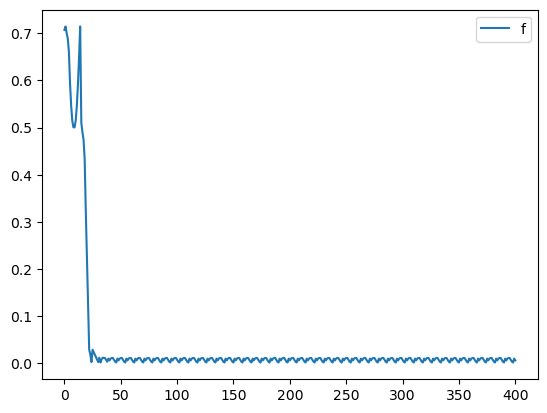

In [18]:
X.data.plot(y="f")